In [1]:
import pandas as pd
import glob
from pathlib import Path

In [4]:
base_dir = Path('C:/Users/LHW/Downloads/output0507')
agent_1_csv_files = glob.glob(str(base_dir / '*agent_1.csv'))
agent_2_csv_files = glob.glob(str(base_dir / '*agent_2.csv'))

In [5]:
agent1_df = pd.concat((pd.read_csv(f, names=['loss', 'q_value', 'score', 'time', 'effort', 'click']) for f in agent_1_csv_files))

In [6]:
agent2_df = pd.concat((pd.read_csv(f, names=['loss', 'q_value', 'score', 'time', 'effort', 'click']) for f in agent_2_csv_files))

In [7]:
agent1_df

,loss,q_value,score,time,effort,click
0,0.000000,0.003301,-13.451804,0.899990,12.451804,-1
1,0.000000,0.000776,-53.343667,0.899990,27.771699,-1
2,0.000000,-0.039358,-59.610358,1.599990,40.302746,-1
3,0.000000,0.004785,-8.493299,1.940207,7.493299,-1
4,0.000000,0.005509,-10.893536,2.499990,9.893536,-1
...,...,...,...,...,...,...
995,0.266406,-8.569628,-6.113285,1.899990,5.113285,-1
996,0.714660,-8.627135,-8.786980,0.799990,7.786980,-1
997,0.539915,-8.647654,-12.105556,0.799990,11.105556,-1
998,0.519022,-9.363786,-11.768254,0.799990,10.768254,-1


In [8]:
agent2_df

,loss,q_value,score,time,effort,click
0,0.000000,0.005316,-13.619944,0.599990,12.619944,-1
1,0.000000,0.015496,-17.213256,2.299990,16.213256,-1
2,0.000000,0.008243,-8.394476,2.399990,7.394476,-1
3,0.000000,0.003532,-1.934886,1.265482,15.934886,14
4,0.000000,-0.018975,16.106521,2.599990,6.307862,14
...,...,...,...,...,...,...
995,0.494758,-8.305117,-7.040668,1.099990,6.040668,-1
996,0.316228,-7.793262,-6.540154,1.099990,5.540154,-1
997,1.195151,-8.555258,-18.188280,1.099990,8.094140,-1
998,0.691701,-9.098814,3.988264,1.474687,10.011736,14


In [9]:
import matplotlib.pyplot as plt
import numpy as np

In [10]:
def moving_avg(x, N=30):
    return np.convolve(x, np.ones((N,))/N, mode='valid')

In [11]:
agent1_np_qvalues = agent1_df['q_value'].to_numpy()
agent2_np_qvalues = agent2_df['q_value'].to_numpy()

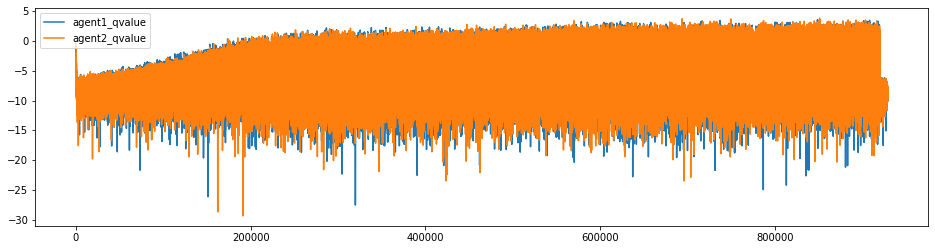

In [29]:
plt.figure(figsize = (16,4))
plt.plot(moving_avg(agent1_np_qvalues, 1), label='agent1_qvalue')
plt.plot(moving_avg(agent2_np_qvalues, 1), label='agent2_qvalue')
plt.legend(loc=2)
plt.savefig('qvalue.png')

In [19]:
agent1_np_loss = agent1_df['loss'].to_numpy()
agent2_np_loss = agent2_df['loss'].to_numpy()

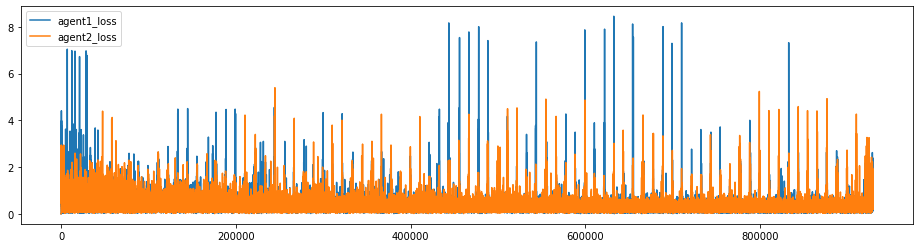

In [30]:
plt.figure(figsize = (16,4))
plt.plot(moving_avg(agent1_np_loss, 1), label='agent1_loss')
plt.plot(moving_avg(agent2_np_loss, 1), label='agent2_loss')
plt.legend(loc=2)
plt.savefig('loss.png')

In [21]:
agent1_np_reward = agent1_df['score'].to_numpy()
agent2_np_reward = agent2_df['score'].to_numpy()

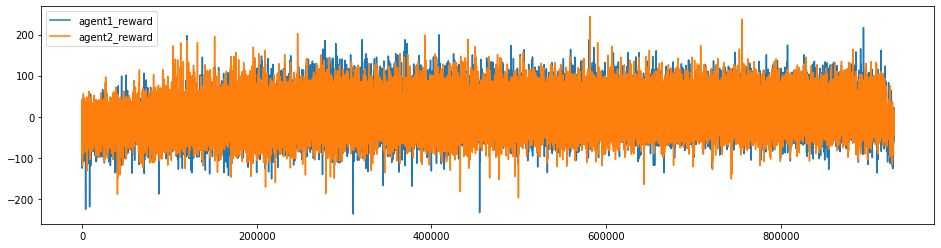

In [23]:
plt.figure(figsize = (16,4))
plt.plot(moving_avg(agent1_np_reward, 1), label='agent1_reward')
plt.plot(moving_avg(agent2_np_reward, 1), label='agent2_reward')
plt.legend(loc=2)
plt.savefig('reward.png')